In [1]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.4.2"

In [10]:
names(Default)
dim(Default) # 4 variables, 10000 data points

[1] "default" "student" "balance" "income"

[1] 10000     4

In [9]:
summary(Default)
sum(Default$default=='Yes')/nrow(Default)*100 #%age of the defaulter

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

[1] 3.33

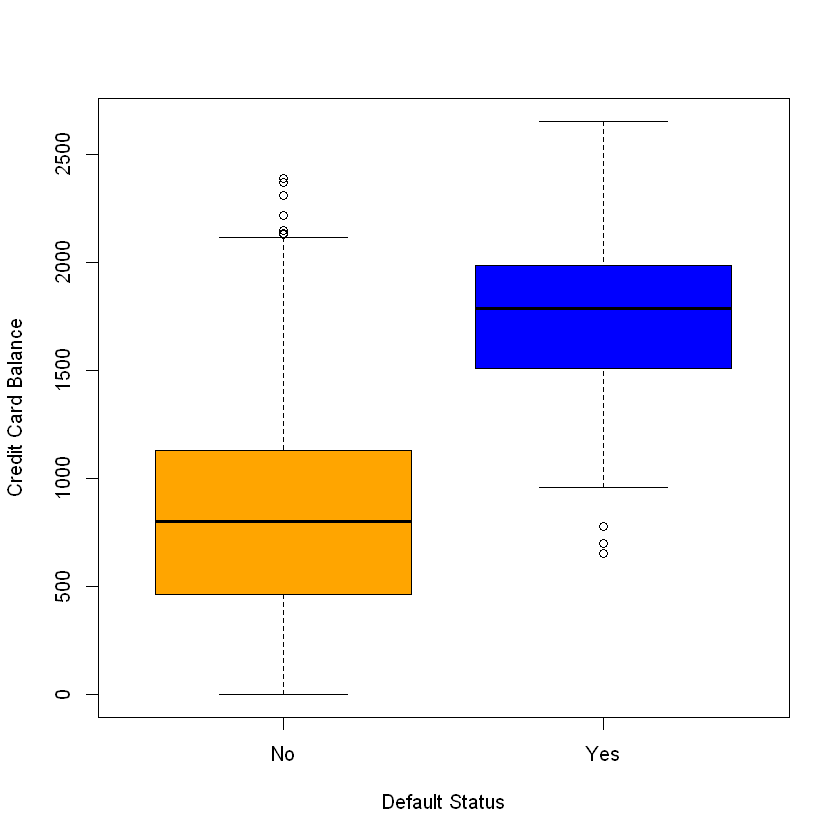

In [39]:
plot(Default$default,Default$balance,col=c('orange','blue'),xlab="Default Status", ylab="Credit Card Balance")

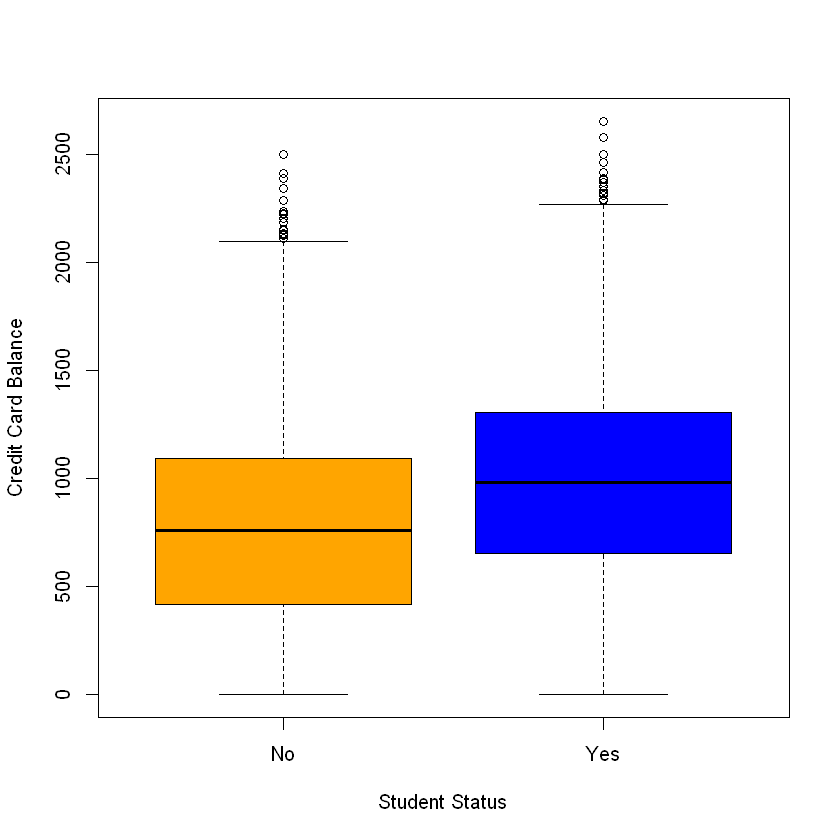

In [40]:
plot(Default$student,Default$balance,col=c('orange','blue'),xlab="Student Status", ylab="Credit Card Balance")

In [15]:
attach(Default)
names(Default)

The following objects are masked from Default (pos = 3):

    balance, default, income, student



[1] "default" "student" "balance" "income"

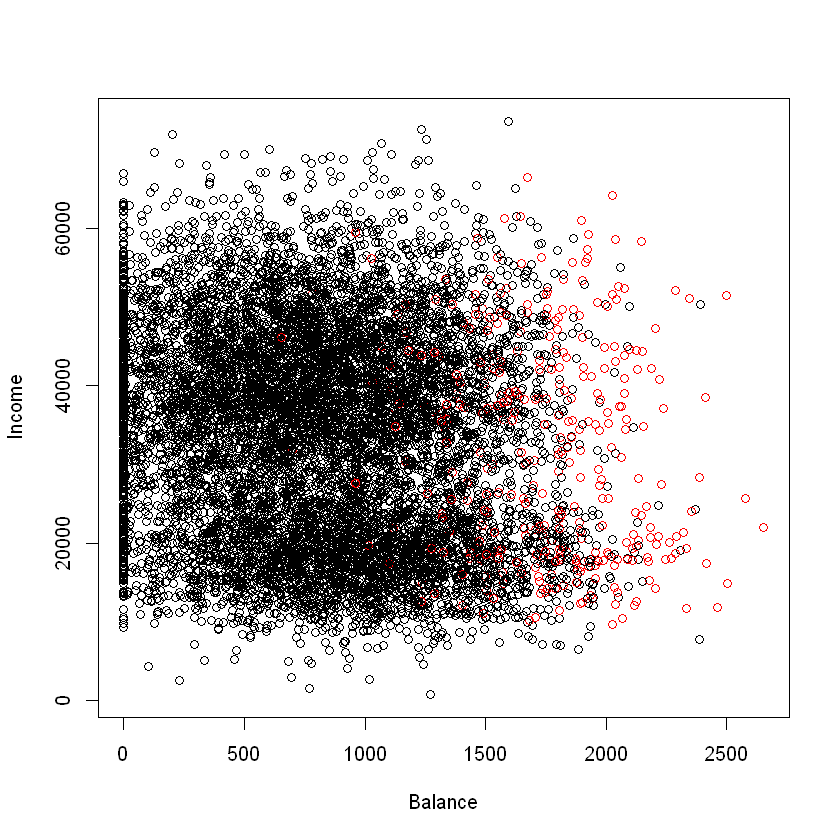

In [37]:
d=as.factor(default)
plot(balance, income, xlab='Balance', ylab='Income', col=d)

# LAB: Lab: Logistic Regression, LDA, QDA, and KNN

The Stock Market Data

In [1]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.4.2"

In [2]:
attach(Smarket)
fix(Smarket)

In [3]:
dim(Smarket) #9 variables, 1250 data points
names(Smarket) #variables Year, Lag1, Lag2, Lag3, Lag4, Volume, Today, Direction is the response

[1] 1250    9

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [4]:
head(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [6]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

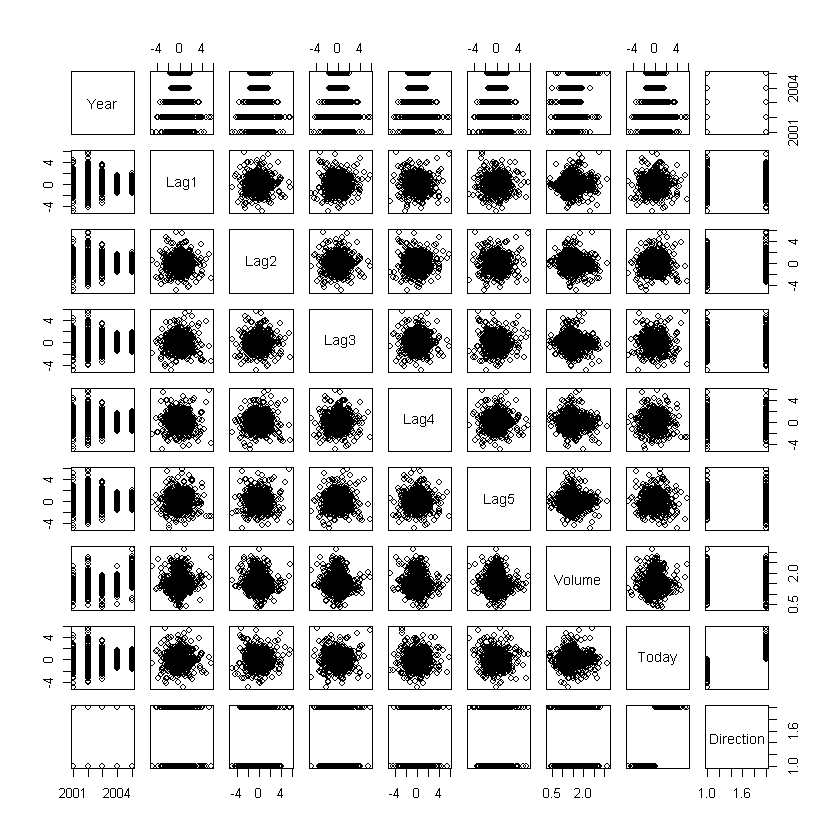

In [7]:
pairs(Smarket) # created scatter plots of the variables

In [8]:
cor(Smarket[,-9]) #gives pairwise correlation, leavig the qualitiative variable

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


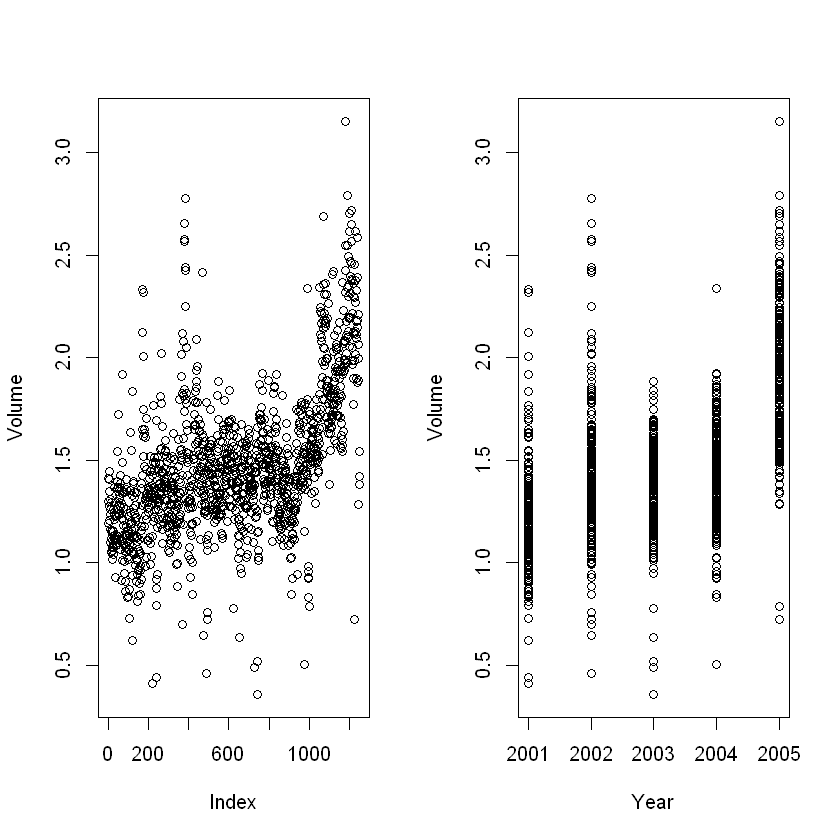

In [15]:
par(mfrow=c(1,2))
plot(Volume)
plot(Year,Volume)

Volume is increasing over time

## Logistic Regression

In [16]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


the p-value is  very large for all

In [17]:
coef(glm.fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [19]:
summary(glm.fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [20]:
summary(glm.fit)$coef[,4]

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In [22]:
glm.probs=predict(glm.fit, type="response") #predicting the probabilities
glm.probs[1:10] #gives probability of market going up since Up is coded as 1

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [25]:
contrasts(Direction)

,Up
Down,0
Up,1


In [26]:
#convert the probabilities into market up and down label
glm.pred=rep("Down",nrow(Smarket)) #create a predicted response variable and initialise it with Down label
glm.pred[glm.probs>0.5]="Up" # use predcited probability to assign label , more than 0.5 is up
table(glm.pred,Direction) #create a confusion matrix

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [28]:
#error rate (FP+FN)/Population
(141+457)/nrow(Smarket) #training error rate or misclassified 
mean(glm.pred==Direction) #correctly classified 

[1] 0.4784

[1] 0.5216

There is an error rate of 47.84%

In [37]:
#Using train and test
t=Year<2005
train=Smarket[t,] # creating train data set for year before 2015
head(train)
dim(train)
test=Smarket[!t,] # test data set for year 2015
head(test)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


[1] 998   9

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
999,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
1000,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
1001,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
1002,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
1003,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down
1004,2005,-0.143,0.351,-0.363,-1.167,-0.812,1.4779,0.342,Up


In [38]:
Direction.test=test$Direction

In [39]:
# fitting model on traiing dataset
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=train, family=binomial)
summary(glm.fit)
glm.probs=predict(glm.fit,test,type="response")



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


In [41]:
glm.pred=rep("Down",nrow(test))
glm.pred[glm.probs>0.5]="Up"
table(glm.pred,Direction.test)

        Direction.test
glm.pred Down Up
    Down   77 97
    Up     34 44

In [43]:
mean(glm.pred==Direction.test) #only 48.12% correctly classified
mean(glm.pred!=Direction.test) #only 51.98% incorrectly classified - test set error rate

[1] 0.4801587

[1] 0.5198413

# 4.6.3 Linear Discriminant Analysis